### Link for the dataset

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

### Here we are going to clean and automatic update the dataset for outr data analysis purposes

In [1]:
#Load EDA lib
import pandas as pd
import geopandas as gpd # is to make working with geospatial data in python easier
import descartes # allows the usage of geometric objects as matplotlib paths and patches

import matplotlib.pyplot as plt
%matplotlib inline

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [3]:
#Load our dataset
df_confirmed =pd.read_csv(confirmed_cases_url)

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541


In [5]:
df_confirmed.shape

(266, 179)

In [6]:
df_confirmed.columns #some are times series data

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20',
       '7/12/20', '7/13/20', '7/14/20'],
      dtype='object', length=179)

In [7]:
df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,732
46546,NaN,Yemen,15.552727,48.516388,7/14/20,1516
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,321
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,6643


In [8]:
confirmed_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [9]:
confirmed_df

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,732
46546,NaN,Yemen,15.552727,48.516388,7/14/20,1516
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,321
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,6643


In [10]:
confirmed_df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [11]:
confirmed_df['Province/State'].isnull().sum()

32375

In [12]:
confirmed_df.rename(columns={"variable":"Date", "value":"confirmed"}, inplace = True)

In [13]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [14]:
confirmed_df.shape

(46550, 6)

In [15]:
confirmed_df.tail()

,Province/State,Country/Region,Lat,Long,Date,confirmed
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,732
46546,NaN,Yemen,15.552727,48.516388,7/14/20,1516
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,321
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,6643
46549,NaN,Lesotho,-29.610000,28.233600,7/14/20,256


In [16]:
# Fuction to fetch and Reshape
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date", "value": case_type}, inplace = True)
    return melted_df

In [17]:
# Fetch death or recovered
recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
death_df = get_n_melt_data(death_cases_url, "Deaths")

In [18]:
#data
recovered_df

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
44270,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,286
44271,NaN,Yemen,15.552727,48.516388,7/14/20,685
44272,NaN,Comoros,-11.645500,43.333300,7/14/20,302
44273,NaN,Tajikistan,38.861000,71.276100,7/14/20,5332


In [19]:
death_df

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,14
46546,NaN,Yemen,15.552727,48.516388,7/14/20,429
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,7
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,56


In [20]:
print(confirmed_df.shape)
print(recovered_df.shape)
print(death_df.shape)

(46550, 6)
(44275, 6)
(46550, 6)


### Merging or joining

In [22]:
confirmed_df

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,732
46546,NaN,Yemen,15.552727,48.516388,7/14/20,1516
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,321
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,6643


In [23]:
recovered_df

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
44270,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,286
44271,NaN,Yemen,15.552727,48.516388,7/14/20,685
44272,NaN,Comoros,-11.645500,43.333300,7/14/20,302
44273,NaN,Tajikistan,38.861000,71.276100,7/14/20,5332


In [24]:
recovered_df['Recovered'].unique()

array([   0,   28,    2, ..., 8327, 1190, 5332], dtype=int64)

In [25]:
final_df   =  [confirmed_df,death_df,recovered_df]
final_df   =  [df.set_index(['Province/State','Country/Region','Lat','Long','Date']) for df in final_df]
final_df   =  final_df[0].join(final_df[1:])

In [26]:
final_df

confirmed  \
Province/State Country/Region        Lat        Long      Date                 
NaN            Afghanistan            33.939110 67.709953 1/22/20        0.0   
               Albania                41.153300 20.168300 1/22/20        0.0   
               Algeria                28.033900 1.659600  1/22/20        0.0   
               Andorra                42.506300 1.521800  1/22/20        0.0   
               Angola                -11.202700 17.873900 1/22/20        0.0   
...                                                                      ...   
               Sao Tome and Principe  0.186400  6.613100  7/14/20      732.0   
               Yemen                  15.552727 48.516388 7/14/20     1516.0   
               Comoros               -11.645500 43.333300 7/14/20      321.0   
               Tajikistan             38.861000 71.276100 7/14/20     6643.0   
               Lesotho               -29.610000 28.233600 7/14/20      256.0   

                                                                   Deaths  \
Province/State Country/Region        Lat        Long      Date              
NaN            Afghanistan            33.939110 67.709953 1/22/20     0.0   
               Albania                41.153300 20.168300 1/22/20     0.0   
               Algeria                28.033900 1.659600  1/22/20     0.0   
               Andorra                42.506300 1.521800  1/22/20     0.0   
               Angola                -11.202700 17.873900 1/22/20     0.0   
...                                                                   ...   
               Sao Tome and Principe  0.186400  6.613100  7/14/20    14.0   
               Yemen                  15.552727 48.516388 7/14/20   429.0   
               Comoros               -11.645500 43.333300 7/14/20     7.0   
               Tajikistan             38.861000 71.276100 7/14/20    56.0   
               Lesotho               -29.610000 28.233600 7/14/20     3.0   

                                                                   Recovered  
Province/State Country/Region        Lat        Long      Date                
NaN            Afghanistan            33.939110 67.709953 1/22/20        0.0  
               Albania                41.153300 20.168300 1/22/20        0.0  
               Algeria                28.033900 1.659600  1/22/20        0.0  
               Andorra                42.506300 1.521800  1/22/20        0.0  
               Angola                -11.202700 17.873900 1/22/20        0.0  
...                                                                      ...  
               Sao Tome and Principe  0.186400  6.613100  7/14/20      286.0  
               Yemen                  15.552727 48.516388 7/14/20      685.0  
               Comoros               -11.645500 43.333300 7/14/20      302.0  
               Tajikistan             38.861000 71.276100 7/14/20     5332.0  
               Lesotho               -29.610000 28.233600 7/14/20       48.0  

[46550 rows x 3 columns]

In [27]:
final_df  = final_df.reset_index()

In [28]:
final_df[['Lat','Long','confirmed','Deaths','Recovered']] = final_df[['Lat','Long','confirmed','Deaths','Recovered']].apply(pd.to_numeric)

In [29]:
final_df

,Province/State,Country/Region,Lat,Long,Date,confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0.0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0.0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0.0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0.0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,7/14/20,732.0,14.0,286.0
46546,NaN,Yemen,15.552727,48.516388,7/14/20,1516.0,429.0,685.0
46547,NaN,Comoros,-11.645500,43.333300,7/14/20,321.0,7.0,302.0
46548,NaN,Tajikistan,38.861000,71.276100,7/14/20,6643.0,56.0,5332.0


In [31]:
final_df[['Date']] = final_df[['Date']].apply(pd.to_datetime)

In [32]:
final_df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [34]:
final_df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
confirmed         False
Deaths            False
Recovered          True
dtype: bool

In [36]:
final_df['Recovered'].unique()

array([   0.,   nan,   28., ..., 8327., 1190., 5332.])

In [39]:
final_df[["confirmed","Deaths","Recovered"]] = final_df[["confirmed","Deaths","Recovered"]].fillna("0").astype(int)

In [40]:
final_df

,Province/State,Country/Region,Lat,Long,Date,confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
46545,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-14,732,14,286
46546,NaN,Yemen,15.552727,48.516388,2020-07-14,1516,429,685
46547,NaN,Comoros,-11.645500,43.333300,2020-07-14,321,7,302
46548,NaN,Tajikistan,38.861000,71.276100,2020-07-14,6643,56,5332


In [41]:
final_df[final_df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,Date,confirmed,Deaths,Recovered
225,NaN,US,40.0,-100.0,2020-01-22,1,0,0
491,NaN,US,40.0,-100.0,2020-01-23,1,0,0
757,NaN,US,40.0,-100.0,2020-01-24,2,0,0
1023,NaN,US,40.0,-100.0,2020-01-25,2,0,0
1289,NaN,US,40.0,-100.0,2020-01-26,5,0,0
...,...,...,...,...,...,...,...,...
45445,NaN,US,40.0,-100.0,2020-07-10,3184573,134092,983185
45711,NaN,US,40.0,-100.0,2020-07-11,3245925,134777,995576
45977,NaN,US,40.0,-100.0,2020-07-12,3304942,135205,1006326
46243,NaN,US,40.0,-100.0,2020-07-13,3364157,135566,1031939


In [42]:
#Export data
final_df.to_csv('covid19_updated_dataset.csv')

### Geospatial plot

In [43]:
final_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [44]:
#Convert data to geodataframe
gdf01 = gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df['Long'],final_df['Lat']))

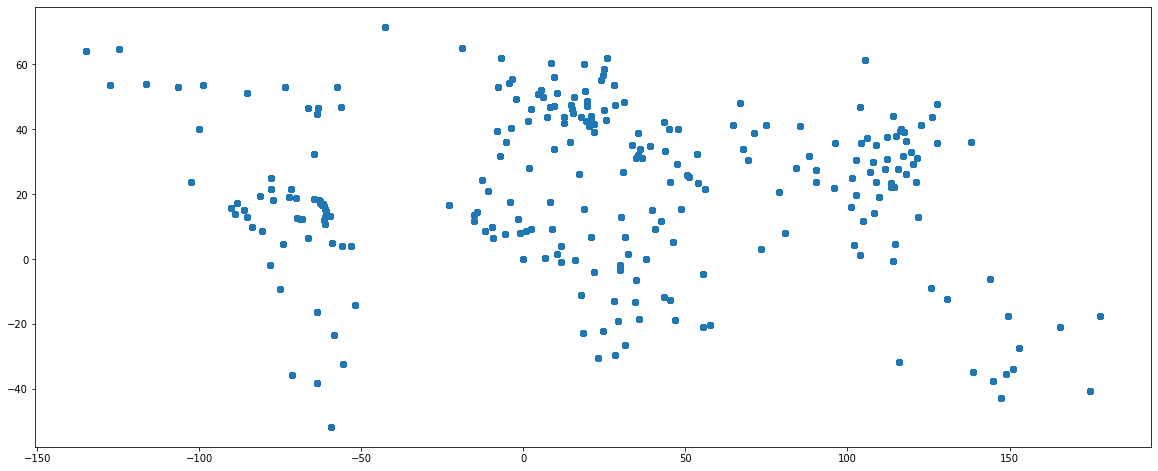

In [45]:
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

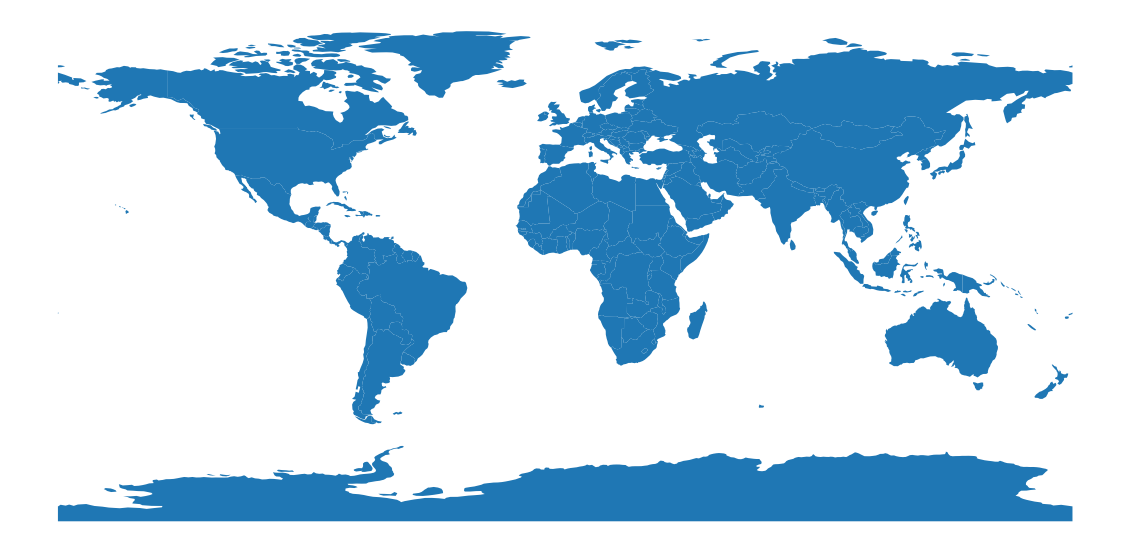

In [46]:
# Overlapping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

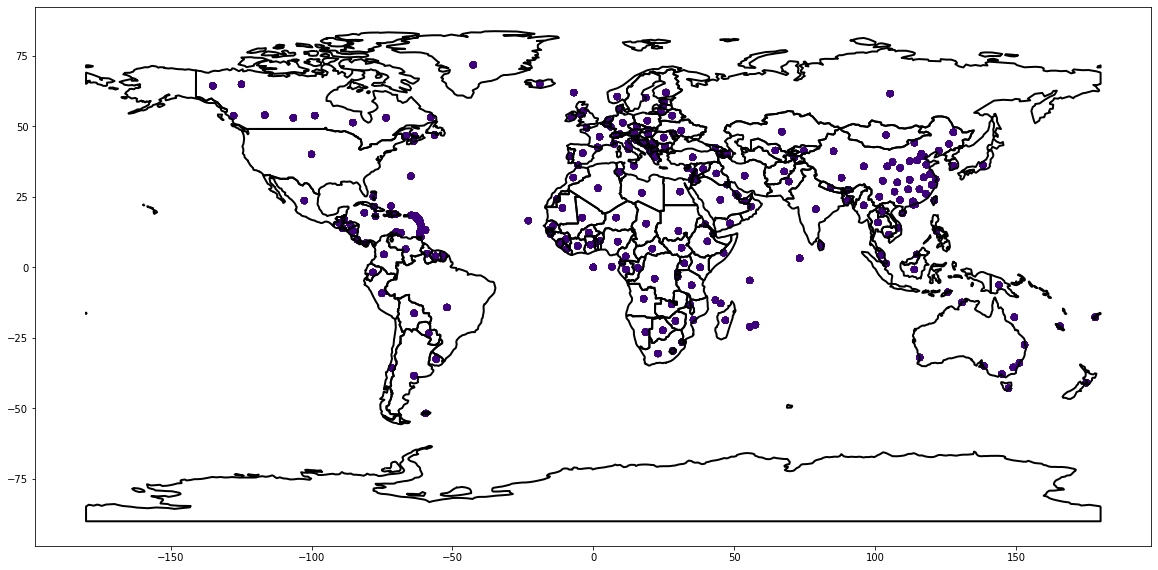

In [47]:
# Overlap with data
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax )